In [1]:
from typing import List, Sequence, Tuple

class MyConvexHull:

	# Menerima seluruh data berupa posisi dari titik-titik
	def __init__(self, points):
		# Mengubah bentuk data ke generator of tuple 
		# sehingga dapat diolah
		param = ((i[0], i[1]) for i in points)
		res = self.make_hull(sorted(param))
		self.x_coords = [i[0] for i in res]
		self.x_coords.append(res[0][0])
		self.y_coords = [i[1] for i in res]
		self.y_coords.append(res[0][1])

	# Membuat Convex Hull
	def make_hull(self, points):
		# Menangani edgecase
		if len(points) <= 1:
			return list(points)

		# Membuat array untuk menampung hasil dari
		# pembagian area akibat algoritma divide and conquer	
		area_one = []
		area_two = []

		# Melakukan conquer sesuai dengan
		# pengertian dari convex hull
		for area in (area_one, area_two):
			if (area != area_one):
				points = reversed(points)

			for p in points:
				while len(area) >= 2:
					check1 = (area[-1][0] - area[-2][0]) * (p[1] - area[-2][1])
					check2 = (area[-1][1] - area[-2][1]) * (p[0] - area[-2][0])
					if (check1 >= check2):
						area.pop()
					else:
						break
				area.append(p)

			area.pop()
	
		if (len(area_one) == 1):
			if (area_one == area_two):
				area_two = []
		
		# Menggabungkan hasil dari kedua buah area
		area_one += area_two

		# Mengembalikan hasil
		return area_one

List dataset yang tersedia:
A. Iris                                C. Breast Cancer
    1. Sepal Length                        1. Mean Radius                      20. Fractal Dimension Error
    2. Sepal Width                         2. Mean Texture                     21. Worst Radius
    3. Petal Length                        3. Mean Perimeter                   22. Worst Texture
    4. Petal Width                         4. Mean Area                        23. Worst Perimeter
                                           5. Mean Smoothness                  24. Worst Area
B. Wine                                    6. Mean Compactness                 25. Worst Smoothness
    1. Alcohol                             7. Mean Concavity                   26. Worst Compactness
    2. Malic Acid                          8. Mean Concave Points              27. Worst Concavity
    3. Ash                                 9. Mean Symmetry                    28. Worst Concave Points
    4. Alcalinity o

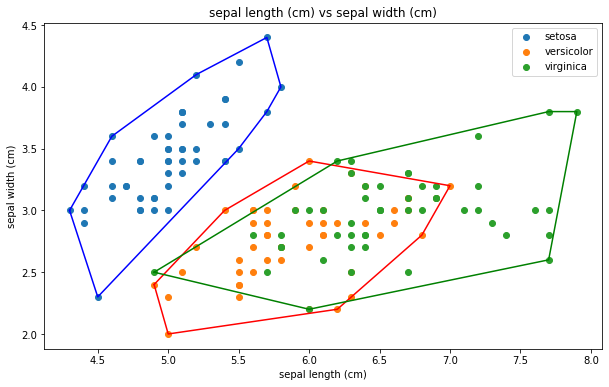

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

from myconvexhull import MyConvexHull

# Untuk checking hasil 
# from scipy.spatial import ConvexHull

if __name__ == "__main__":
	print("List dataset yang tersedia:")
	print("A. Iris                                C. Breast Cancer")
	print("    1. Sepal Length                        1. Mean Radius                      20. Fractal Dimension Error")
	print("    2. Sepal Width                         2. Mean Texture                     21. Worst Radius")
	print("    3. Petal Length                        3. Mean Perimeter                   22. Worst Texture")
	print("    4. Petal Width                         4. Mean Area                        23. Worst Perimeter")
	print("                                           5. Mean Smoothness                  24. Worst Area")
	print("B. Wine                                    6. Mean Compactness                 25. Worst Smoothness")
	print("    1. Alcohol                             7. Mean Concavity                   26. Worst Compactness")
	print("    2. Malic Acid                          8. Mean Concave Points              27. Worst Concavity")
	print("    3. Ash                                 9. Mean Symmetry                    28. Worst Concave Points")
	print("    4. Alcalinity of Ash                  10. Mean Fractal Dimension           29. Worst Symmetry")
	print("    5. Magnesium                          11. Radius Error                     30. Worst Fractal Dimension")
	print("    6. Total Phenols                      12. Texture Error                    ")
	print("    7. Flavanoids                         13. Perimeter Error                  ")
	print("    8. Non Flavanoid Phenols              14. Area Error                       ")
	print("    9. Proanthocyanis                     15. Smoothness Error                 ")
	print("   10. Color Intensity                    16. Compactness Error                ")
	print("   11. Hue                                17. Concavity Error                  ")
	print("   12. OD280/OD315 of Diluted Wines       18. Concave Points Error             ")
	print("   13. Proline                            19. Symmetry Error                   ")
	print()

	print("Contoh Input: C 4 25")
	option = str(input("Input dataset yang diinginkan: ")).split()

	if (option[0]=='A'):
		if (int(option[1]) > 4 or int(option[2]) > 4):
			print("Dataset tidak tersedia")
			exit()
		if (int(option[1]) < 1 or int(option[2]) < 1):
			print("Dataset tidak tersedia")
			exit()
		if (option[1] == option[2]):
			print("Pilihan kolom harus berbeda")
			exit()

		col_a = int(option[1]) - 1
		col_b = int(option[2]) - 1
		data = datasets.load_iris()

	elif (option[0]=='B'):
		if (int(option[1]) > 13 or int(option[2]) > 13):
			print("Dataset tidak tersedia")
			exit()
		if (int(option[1]) < 1 or int(option[2]) < 1):
			print("Dataset tidak tersedia")
			exit()
		if (option[1] == option[2]):
			print("Pilihan kolom harus berbeda")
			exit()

		col_a = int(option[1]) - 1
		col_b = int(option[2]) - 1

		data = datasets.load_wine()

	elif (option[0]=='C'):
		if (int(option[1]) > 30 or int(option[2]) > 30):
			print("Dataset tidak tersedia")
			exit()
		if (int(option[1]) < 1 or int(option[2]) < 1):
			print("Dataset tidak tersedia")
			exit()
		if (option[1] == option[2]):
			print("Pilihan kolom harus berbeda")
			exit()

		col_a = int(option[1]) - 1
		col_b = int(option[2]) - 1

		data = datasets.load_breast_cancer()
		

	else:
		print("Dataset tidak tersedia")
		exit()

	pd.set_option('display.max_columns', 500)
	#create a DataFrame 
	df = pd.DataFrame(data.data, columns=data.feature_names) 
	df['Target'] = pd.DataFrame(data.target) 
	# print(df)
	df.head()
	plt.figure(figsize = (10, 6))
	colors = ['b','r','g', 'c', 'm', 'y', 'k', 'w', 'aquamarine', 'mediumseagreen']
	plt.title(data.feature_names[col_a] + " vs " + data.feature_names[col_b])
	plt.xlabel(data.feature_names[col_a])
	plt.ylabel(data.feature_names[col_b])
	for i in range(len(data.target_names)):
		bucket = df[df['Target'] == i]
		bucket = bucket.iloc[:,[col_a,col_b]].values
		# hull = ConvexHull(bucket)
		# print(bucket)
		hull = MyConvexHull(bucket)
		plt.plot(hull.x_coords, hull.y_coords, colors[i])
		plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
		# plt.plot(hull[0], hull[1], colors[i])
		# print(hull.simplices)
		# for simplex in hull.simplices:
		# 	print(simplex)
		# 	plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
	plt.legend()
	plt.show()